In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [191]:
#function for output vector
def y(T):
    list=[]       
    y=0
    for item in range(1,T+1):
        y= y + np.random.normal(0,0.5,(1,1))[0]
        list.append(y)
    return np.matrix(np.array(list)).reshape(T,1)
    

In [192]:
#function for input vector
def x(T,i,s):
    np.random.seed(s)
    list1=[]
    x=0
    for item in range(1,T+1):
        for item in range(1,i+1):
            x= x + np.random.normal(0,0.5,(1,1))[0]
            list1.append(x)
    return np.matrix(np.array(list1)).reshape(T,i)

In [193]:
#function for design matrix
def designm(x):
    return np.hstack((np.ones((x.shape[0],1)),x))  

In [194]:
#2
#program to comute the list of mean r2 of each T value(nsim=99) for each caseby using monte carlo
list_new=[]
for i in [1,2,3,5,10]:
    list_mean_r2=[]
    for T in [10,50,100,150,200,250,300]:
        nsim=0
        r2=[] 
        while nsim<100:
            reg = LinearRegression()
            reg= reg.fit(designm(x(T,i,nsim)),y(T))
            #print(designm(x(T,i,nsim)))
            #print(T)
            #print(i)
            r_square= reg.score(designm(x(T,i,nsim)),y(T))
            r2.append(r_square)
            nsim +=1
        list_mean_r2.append(sum(r2)/len(r2))
    list_new.append(list_mean_r2)
        

In [14]:
import matplotlib.pyplot as plt
    

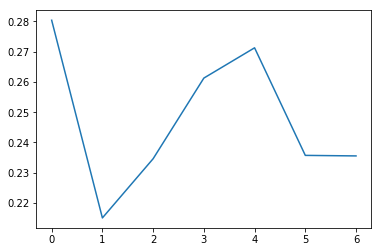

In [196]:
#n=1
plt.plot(list_new[0])

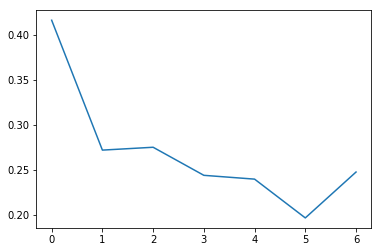

In [197]:
#n=2
plt.plot(list_new[1])

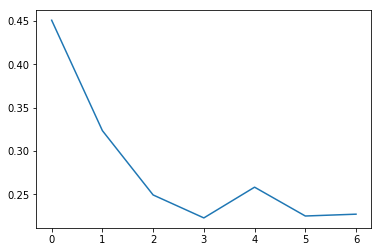

In [198]:
#n=3
plt.plot(list_new[2])

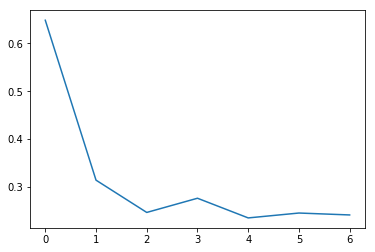

In [199]:
#n=5
plt.plot(list_new[3])

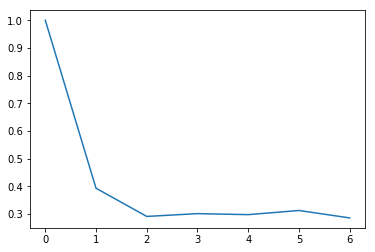

In [200]:
#n=10
plt.plot(list_new[4])

In [201]:
#2 
#function to generate the output vector
def y1(T):
    list=[]       
    for item in range(1,T+1):
        y=np.random.normal(0,0.5,(1,1))[0]
        list.append(y)
    return np.matrix(np.array(list)).reshape(T,1)

In [202]:
#function to genearte input vector
def x1(T,i,s):
    np.random.seed(s)
    list1=[]
    x=0
    for item in range(1,T+1):
        for item in range(1,i+1):
            x= x + np.random.normal(0,0.5,(1,1))[0]
            list1.append(x)
    return np.matrix(np.array(list1)).reshape(T,i)

In [203]:
#2
#program to comute the list of mean r2 of each T value(nsim=99) for each case by suing monte carlo
list_new=[]
for i in [1,2,3,5,10]:
    list_mean_r2=[]
    for T in [10,50,100,150,200,250,300]:
        nsim=0
        r2=[] 
        while nsim<100:
            reg = LinearRegression()
            reg= reg.fit(designm(x1(T,i,nsim)),y1(T))
            #print(designm(x(T,i,nsim)))
            #print(T)
            #print(i)
            r_square= reg.score(designm(x1(T,i,nsim)),y1(T))
            r2.append(r_square)
            nsim +=1
        list_mean_r2.append(sum(r2)/len(r2))
    list_new.append(list_mean_r2)
        

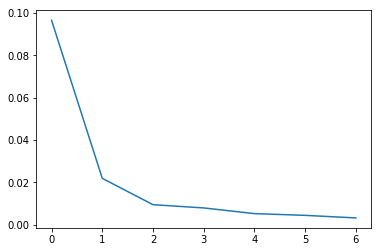

In [204]:
#n=1
plt.plot(list_new[0])

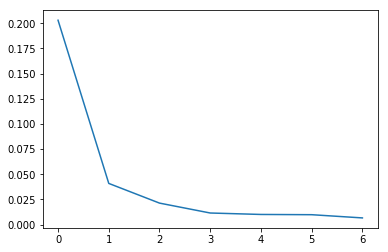

In [205]:
#n=2
plt.plot(list_new[1])

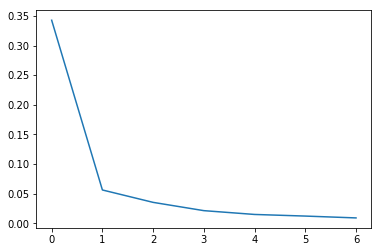

In [206]:
#n=3
plt.plot(list_new[2])

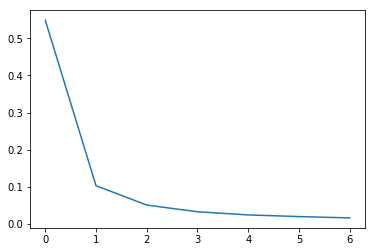

In [207]:
#n=5
plt.plot(list_new[3])

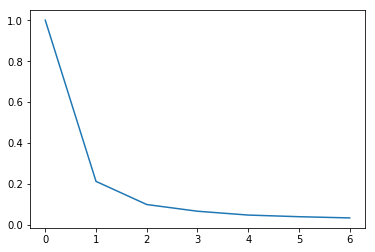

In [208]:
#n=10
plt.plot(list_new[4])

In [251]:
# function to compute the output veactor
def y2(T,ro):
    list11=[]
    list2=[]
    y=0
    rho_li= [ro]
    for rho in rho_li: 
        for item in range(1,T+1):
            y= rho*y + np.random.normal(0,0.5,(1,1))[0]
            list11.append(y)
    list2.append(list11)
    list11.clear
    return np.matrix(np.array(list2)).reshape(T,len(rho_li))
    

In [250]:
#function to genearte the input vector
def x2_pre(T,s):
    np.random.seed(s)
    list12=[]
    y=0
    for item in range(1,T+1):
        y= y + np.random.normal(0,0.5,(1,1))[0]
        list12.append(y)
    return np.matrix(np.array(list12)).reshape(T,1)

In [249]:
#function to genearte the input vector
def x2(T,s,cons):
    mat=x2_pre(T,s)
    array= np.array(mat)
    array=array.reshape(1,T)
    array=array[0]
    li= array.tolist()
    li.insert(0,cons)
    li= li[:T]
    li
    return np.matrix(np.array(li)).reshape(T,1)


In [297]:
#3
#equation1,program to compute  reg coeff by monte carlo
list_new=[]
for T in [10]:
    for  ro in [0.25]: 
        nsim=0 
        while nsim<51:
            reg = LinearRegression()
            reg= reg.fit(designm(x2(T,nsim,0)),y2(T,ro))
            #print(designm(x(T,i,nsim)))
            #print(T)
            #print(i)
            reg_coeff= reg.coef_
            reg_coeff.tolist()
            reg_coeff= reg_coeff[0]
            nsim +=1
            list_new.append(reg_coeff.tolist())

In [298]:
#bias of b2 
item=0
for i in range(0,len(list_new)):
    item= item+ list_new[i][1]
average_coeffb2=item/len(list_new)
average_coeffb2
#rho= 0.25
bias=abs(0.25- average_coeffb2)
bias

0.24562072835240784

In [299]:
#variance of b2
var_list=[]
for i in range(0,len(list_new)):
    var_list.append(list_new[i][1])
variance=np.var(var_list)
variance


0.11535448544463543

In [285]:
#3 constant=0
#program to compute  reg coeff by monte carlo
#equation2
list_new=[]
for T in [10]:
    for  ro in [0.25]: 
        nsim=0 
        while nsim<51:
            reg = LinearRegression()
            reg= reg.fit(designm(x2(T,nsim,-1.5)),y2(T,ro))
            #print(designm(x(T,i,nsim)))
            #print(T)
            #print(i)
            reg_coeff= reg.coef_
            reg_coeff.tolist()
            reg_coeff= reg_coeff[0]
            nsim +=1
            list_new.append(reg_coeff.tolist())


In [292]:
#bias of b2 
item=0
for i in range(0,len(list_new)):
    item= item+ list_new[i][1]
average_coeffb2=item/len(list_new)
average_coeffb2
#rho= 0.25
bias=abs(0.25- average_coeffb2)
bias

0.24998236897943873

In [296]:
#variance of b2
var_list=[]
for i in range(0,len(list_new)):
    var_list.append(list_new[i][1])
variance=np.var(var_list)
variance
    

0.06036598876624133